In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 高清显示图片
%matplotlib inline
%config InlineBackend.figure_format="retina"
# 保证可以显示中文字体
plt.rcParams['font.sans-serif']=['SimHei']
# 正常显示负号
plt.rcParams['axes.unicode_minus']=False

In [2]:
# 读取数据
row_data = pd.read_csv('car_price.csv')
row_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [3]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# 减少内存占用
# 数据精度量化压缩
def reduce_mem_usage(df):
    # 处理前 数据集总内存计算
    start_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    # 遍历特征列
    for col in df.columns:
        # 当前特征类型
        col_type = df[col].dtype
        # 处理 numeric 型数据
        if col_type != object:
            c_min = df[col].min()  # 最小值
            c_max = df[col].max()  # 最大值
            # int 型数据 精度转换
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
                    
            # float 型数据 精度转换
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        # 处理 object 型数据
        # else:
        #     df[col] = df[col].astype('category')  # object 转 category
    
    # 处理后 数据集总内存计算
    end_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

row_data = reduce_mem_usage(row_data)
row_data.info()

Memory usage of dataframe is 0.04 MB
Memory usage after optimization is: 0.02 MB
Decreased by 47.5%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int16  
 1   symboling         205 non-null    int8   
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float16
 10  carlength         205 non-null    float16
 11  carwidth          205 non-null    float16
 12  carheight         205 non-null    float16
 13  curbweight        205 non-null    int16  
 14  enginetype        205 non-null    obje

In [5]:
row_data.duplicated().sum() # 检查是否有重复值

0

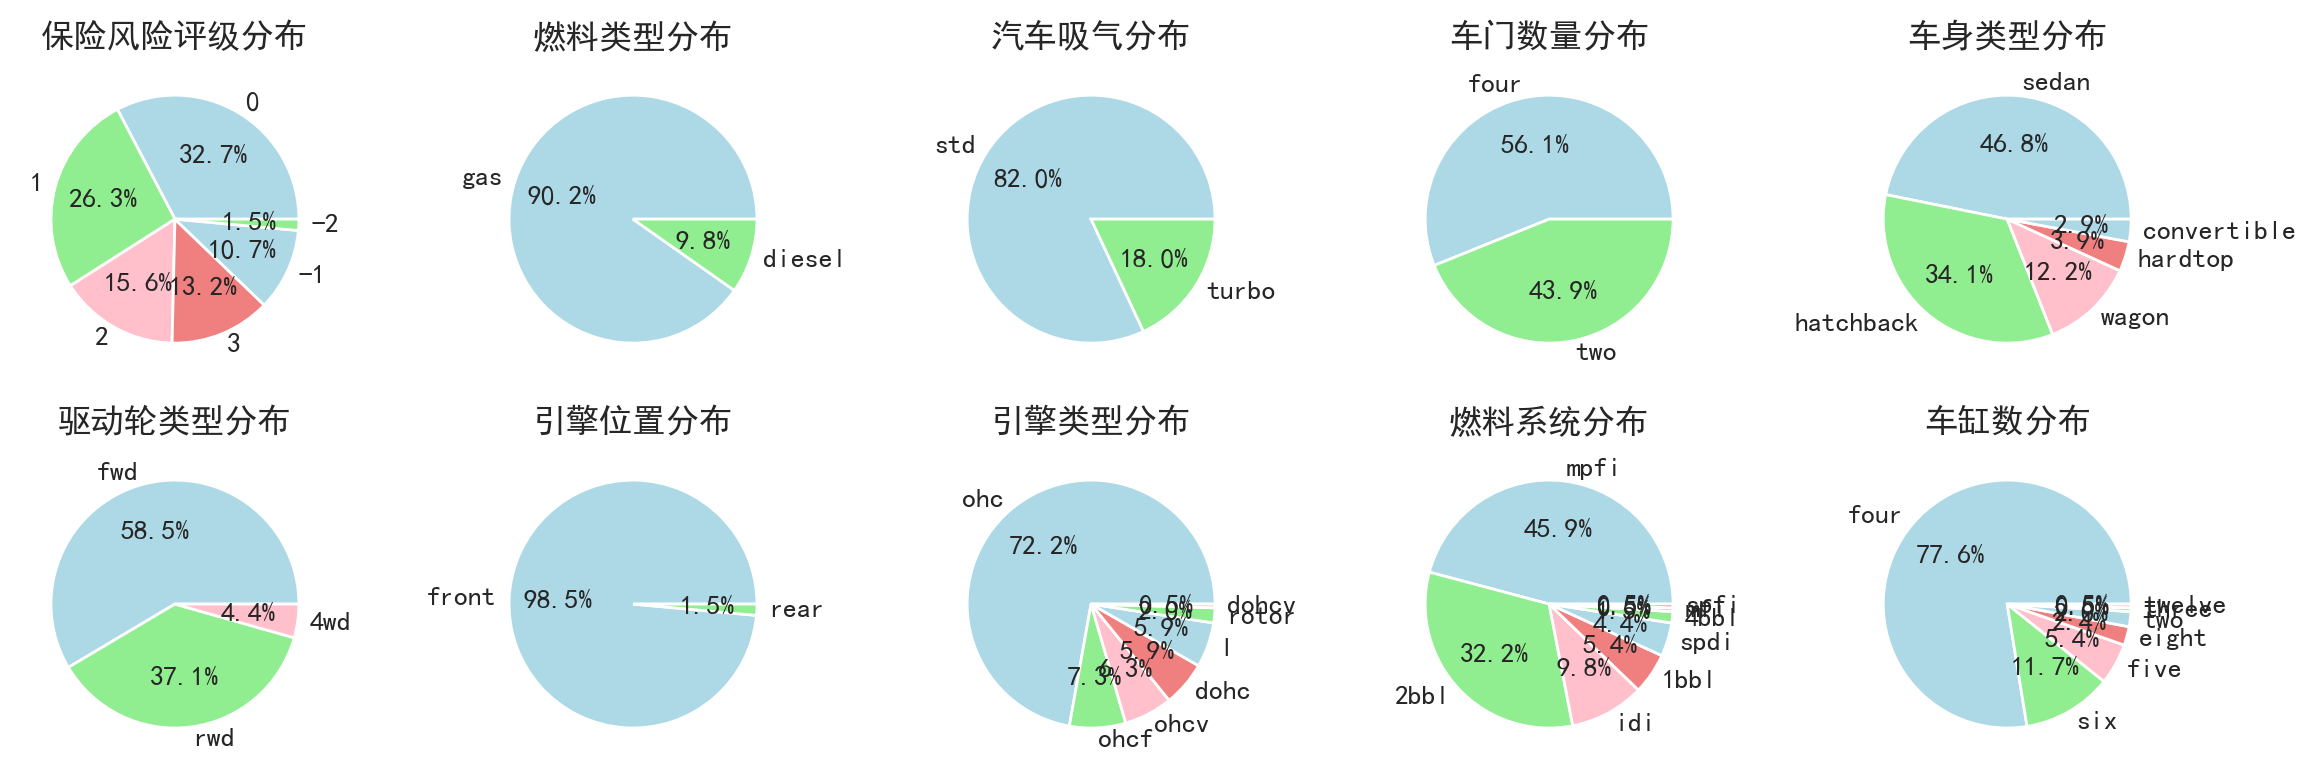

In [6]:
import matplotlib.pyplot as plt

# 定义属性和对应的取值及其数量
names = ['保险风险评级', '燃料类型', '汽车吸气', '车门数量', '车身类型',
              '驱动轮类型', '引擎位置', '引擎类型', '燃料系统', '车缸数']

attributes = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
              'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'cylindernumber']

values = [[0, 1, 2, 3, -2, -1],
          ['diesel', 'gas'],
          ['std', 'turbo'],
          ['four', 'two'],
          ['convertible', 'hardtop', 'sedan', 'wagon', 'hatchback'],
          ['rwd', 'fwd', '4wd'],
          ['front', 'rear'],
          ['l', 'ohc', 'dohcv', 'dohc', 'ohcf', 'ohcv', 'rotor'],
          ['spdi', '1bbl', 'mpfi', '2bbl', '4bbl', 'idi', 'mfi', 'spfi'],
          ['twelve', 'six', 'four', 'eight', 'three', 'five', 'two']]

# 设置子图布局
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

# 遍历属性，绘制子图
for i, attr in enumerate(attributes):
    name = names[i]
    
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # 绘制饼图
    attr_values = row_data[attr].value_counts().values.tolist()
    attr_labels = row_data[attr].value_counts().index.tolist()
    
    # 设置新的配色方案
    colors = ['lightblue', 'lightgreen', 'pink', 'lightcoral']
    ax.set_prop_cycle('color', colors)
    
    ax.pie(attr_values, labels=attr_labels, autopct='%1.1f%%')
    ax.set_title(f'{name}分布')

plt.tight_layout()
plt.show()

In [7]:
# 提取非数值变量的列名
cate_columns=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','cylindernumber']

# 打印类别变量每个分类的取值情况
for i in cate_columns:
    print(i, set(row_data[i]))

symboling {0, 1, 2, 3, -2, -1}
fueltype {'diesel', 'gas'}
aspiration {'turbo', 'std'}
doornumber {'four', 'two'}
carbody {'convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'}
drivewheel {'4wd', 'rwd', 'fwd'}
enginelocation {'front', 'rear'}
enginetype {'dohcv', 'ohcv', 'dohc', 'ohc', 'ohcf', 'l', 'rotor'}
fuelsystem {'mfi', 'spfi', '4bbl', 'spdi', 'idi', 'mpfi', '1bbl', '2bbl'}
cylindernumber {'five', 'two', 'twelve', 'three', 'six', 'four', 'eight'}


In [8]:
# 气缸数可使用具体的数值替换分类
row_data['cylindernumber'] = row_data.cylindernumber.replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
print(set(row_data['cylindernumber']))
# 门的数量也可替换
row_data['doornumber'] = row_data.doornumber.replace({'two':2,'four':4})
print(set(row_data['doornumber']))

{2, 3, 4, 5, 6, 8, 12}
{2, 4}


In [9]:
# 提取变量特征数据(除了'car_ID'和'CarName')
car_df = row_data.drop(['car_ID', 'CarName'], axis=1)

# 查看连续数值型情况，并是检查否有异常值
# 对数据进行描述性统计
car_df.describe() # 只会统计数值类型的变量

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.0
mean,0.834146,3.121951,98.750000,174.00000,65.937500,53.750000,2555.565854,4.380488,126.907317,3.330078,3.255859,10.148438,104.117073,5125.121951,25.219512,30.751220,inf
std,1.245307,0.994966,6.019531,12.34375,2.140625,2.441406,520.680204,1.080854,41.642693,0.270752,0.313721,3.972656,39.544167,476.985643,6.542142,6.886443,inf
min,-2.000000,2.000000,86.625000,141.12500,60.312500,47.812500,1488.000000,2.000000,61.000000,2.539062,2.070312,7.000000,48.000000,4150.000000,13.000000,16.000000,5120.0
25%,0.000000,2.000000,94.500000,166.25000,64.125000,52.000000,2145.000000,4.000000,97.000000,3.150391,3.109375,8.601562,70.000000,4800.000000,19.000000,25.000000,7788.0
50%,1.000000,4.000000,97.000000,173.25000,65.500000,54.093750,2414.000000,4.000000,120.000000,3.310547,3.289062,9.000000,95.000000,5200.000000,24.000000,30.000000,10296.0
75%,2.000000,4.000000,102.375000,183.12500,66.875000,55.500000,2935.000000,4.000000,141.000000,3.580078,3.410156,9.398438,116.000000,5500.000000,30.000000,34.000000,16496.0
max,3.000000,4.000000,120.875000,208.12500,72.312500,59.812500,4066.000000,12.000000,326.000000,3.939453,4.171875,23.000000,288.000000,6600.000000,49.000000,54.000000,45408.0


Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


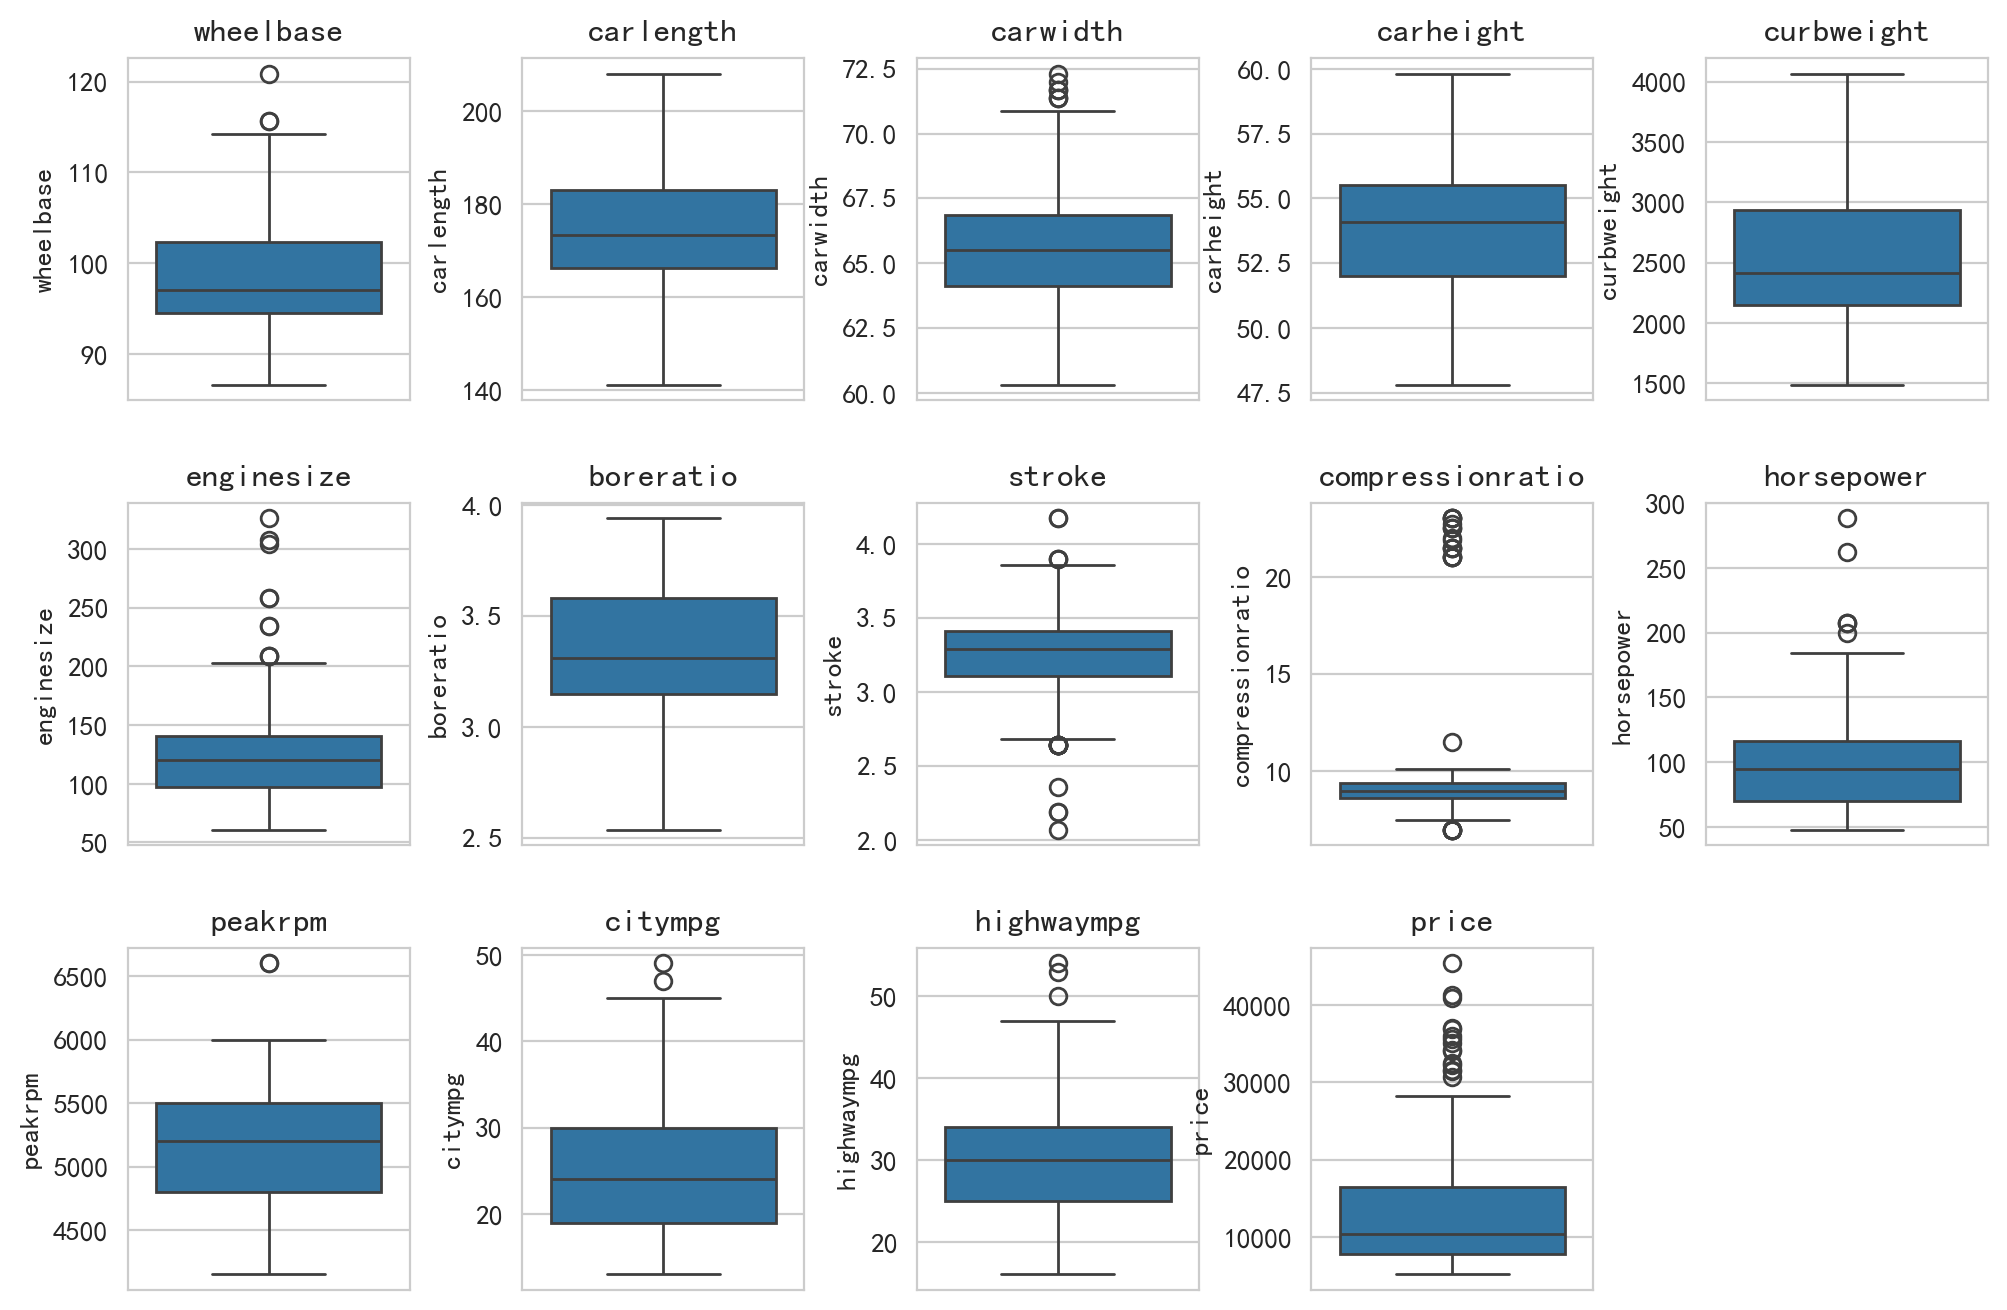

In [10]:
# 提取连续数值型数据的列名
num_cols = car_df.columns.drop(cate_columns)
print(num_cols)

# 绘制连续数值型数据的箱线图
fig = plt.figure(figsize=(12, 8))
i = 1
for col in num_cols:
    ax = fig.add_subplot(3, 5, i)
    sns.boxplot(data=car_df[col], ax=ax)
    i += 1
    plt.title(col)

plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

In [11]:
# 箱型图判断异常点
def box_outlier(data):
    df = data.copy(deep=True)
    out_index = []
    for col in df.columns:             # 对每一列分别用箱型图进行判断
        Q1 = df[col].quantile(q=0.25)       # 下四分位
        Q3 = df[col].quantile(q=0.75)       # 上四分位
        low_whisker = Q1 - 1.5 * (Q3 - Q1)  # 下边缘
        up_whisker = Q3 + 1.5 * (Q3 - Q1)   # 上边缘
        
        # 寻找异常点,获得异常点索引值，删除索引值所在行数据
        rule = (df[col] > up_whisker) | (df[col] < low_whisker)  
        out = df[col].index[rule]
        out_index += out.tolist()  
    df.drop(out_index, inplace=True)
    return df

data_today = car_df[num_cols]
data_today = box_outlier(data_today)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


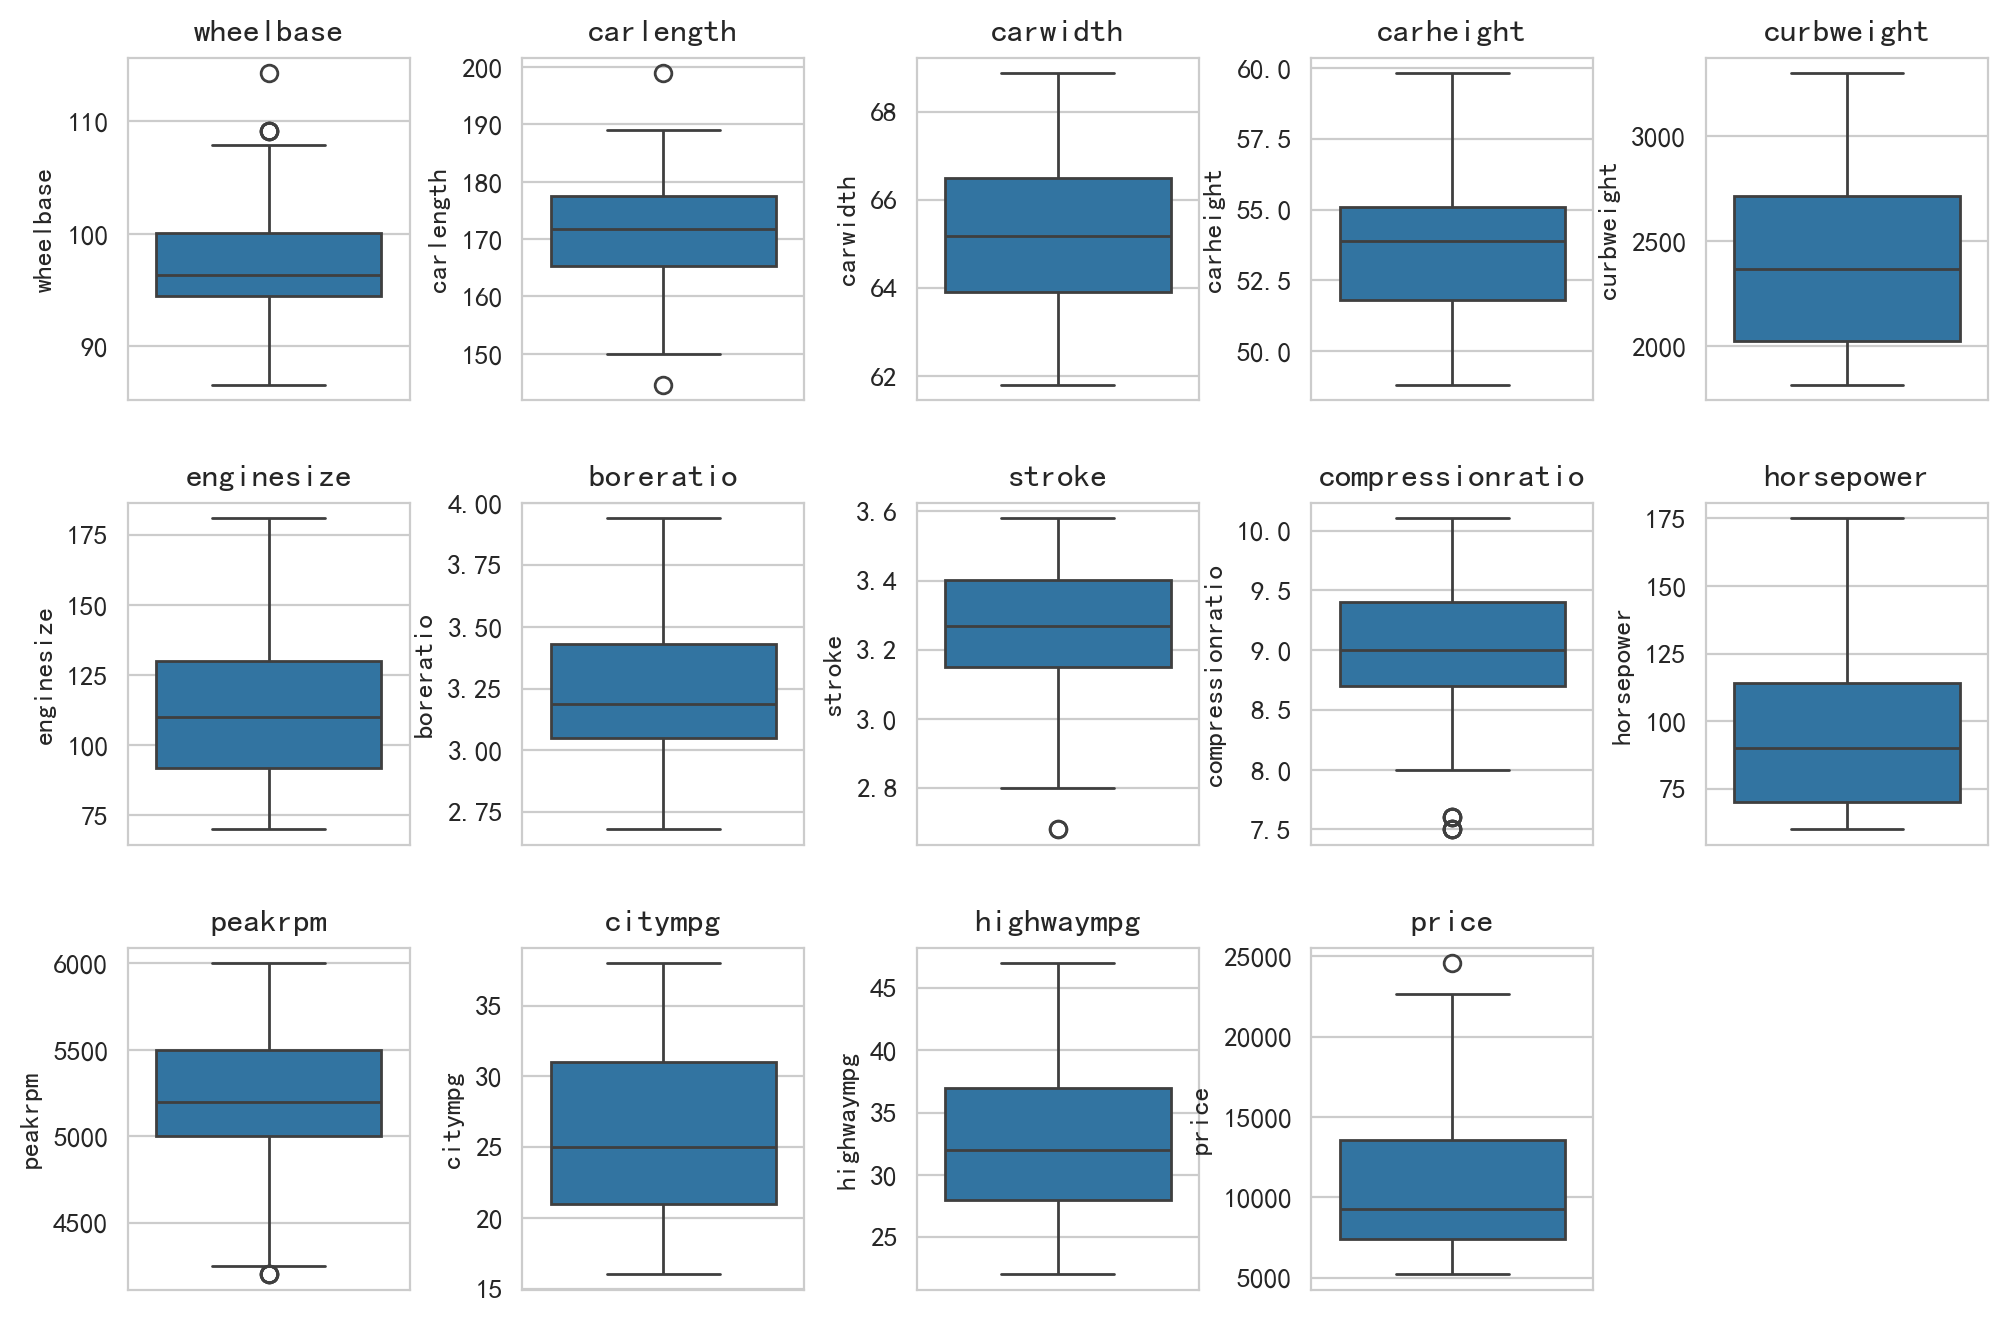

In [12]:
# 提取连续数值型数据的列名
num_cols = car_df.columns.drop(cate_columns)
print(num_cols)

# 绘制连续数值型数据的箱线图
fig = plt.figure(figsize=(12, 8))
i = 1
for col in num_cols:
    ax = fig.add_subplot(3, 5, i)
    sns.boxplot(data=data_today[col], ax=ax)
    i += 1
    plt.title(col)

plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

In [13]:
#去重查看CarName
print(row_data['CarName'].drop_duplicates())#验证是否object全部改为数值类型

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
196                 volvo 244dl
197                   volvo 245
198                 volvo 264gl
199                volvo diesel
203                   volvo 246
Name: CarName, Length: 147, dtype: object


In [14]:
#利用split，由CarName拆出品牌信息
car_brand = row_data['CarName'].str.split(expand=True)[0]
#查看汽车品牌名称（过滤重复）
print(set(car_brand))

{'chevrolet', 'jaguar', 'vw', 'volkswagen', 'bmw', 'vokswagen', 'buick', 'subaru', 'nissan', 'toyouta', 'plymouth', 'renault', 'Nissan', 'mitsubishi', 'volvo', 'alfa-romero', 'audi', 'peugeot', 'isuzu', 'dodge', 'saab', 'maxda', 'mazda', 'honda', 'mercury', 'toyota', 'porsche', 'porcshce'}


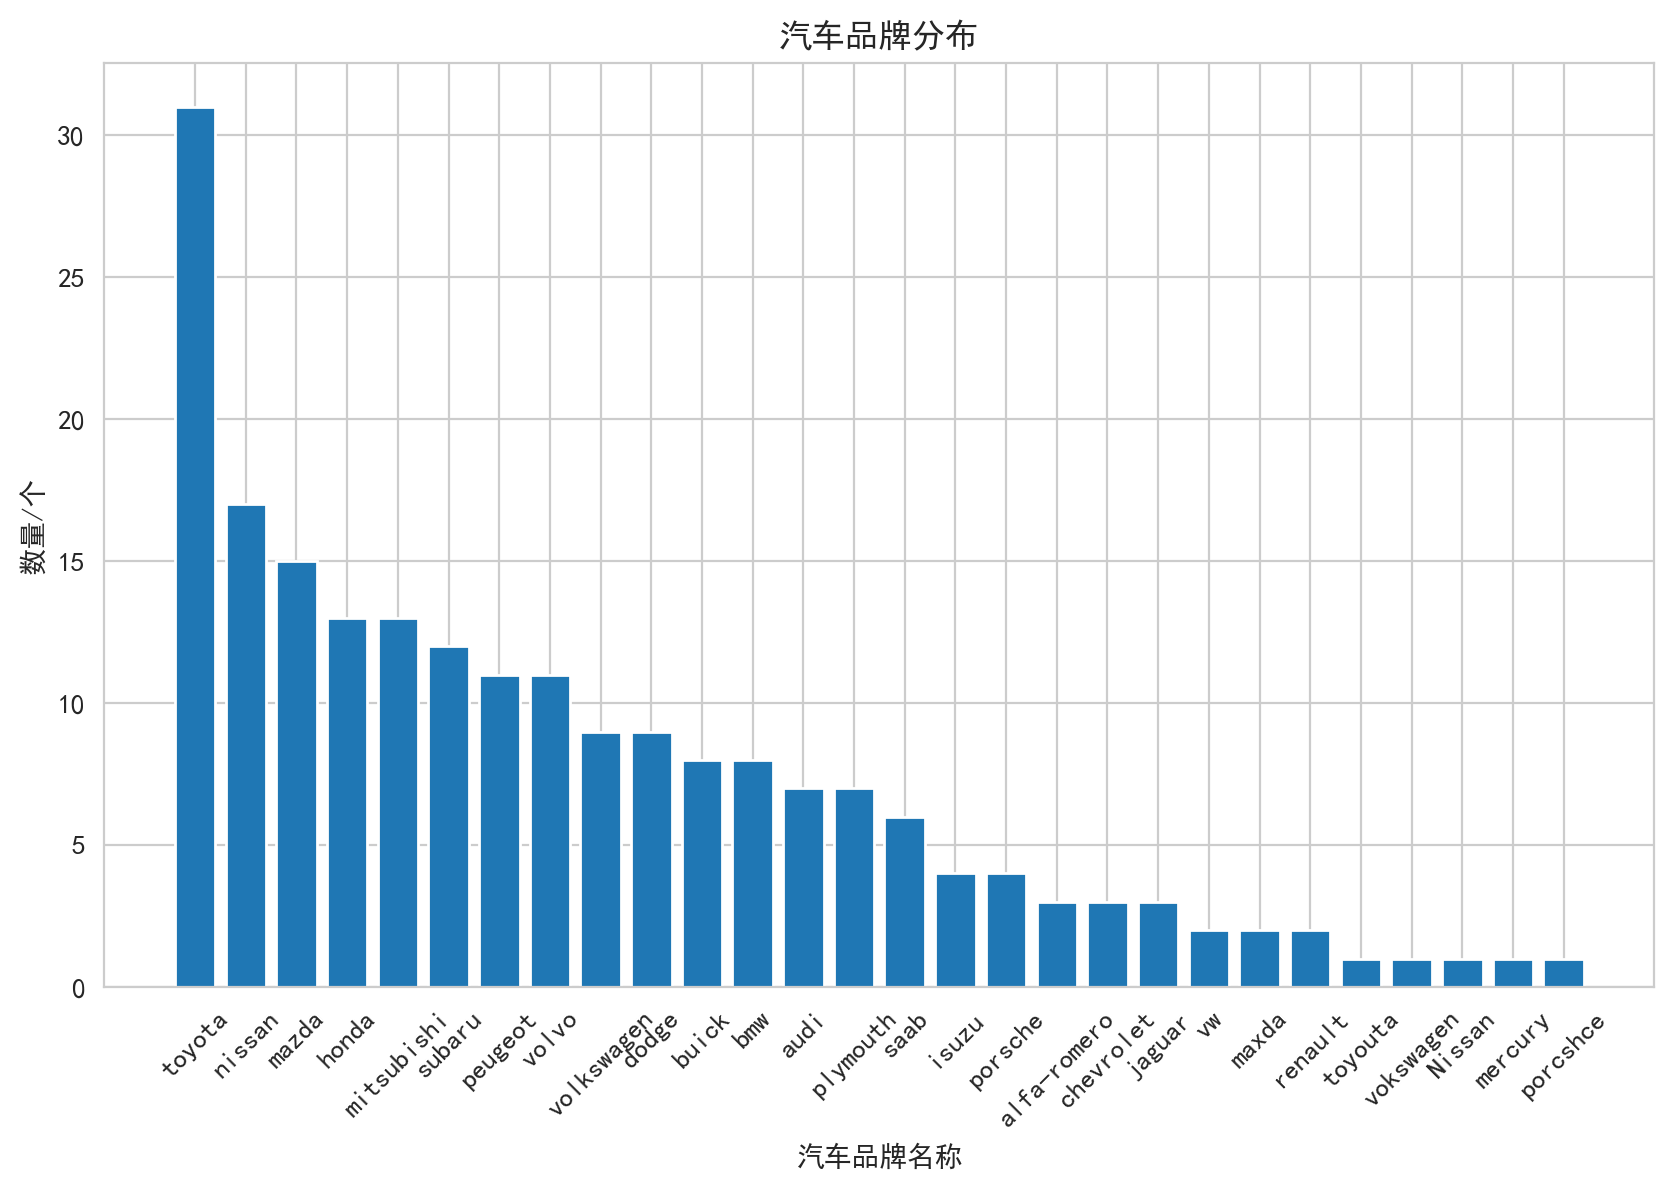

In [15]:
import matplotlib.pyplot as plt

car_brand = row_data['CarName'].str.split(expand=True)[0]

brand_counts = car_brand.value_counts()

plt.figure(figsize=(10, 6))
plt.bar(brand_counts.index, brand_counts.values)
plt.xlabel('汽车品牌名称')
plt.ylabel('数量/个')
plt.title('汽车品牌分布')

plt.xticks(rotation=45)
plt.show()

In [16]:
# 修改不合法品牌名称
car_brand = car_brand.replace({'porcshce':'porsche','vokswagen':'volkswagen','Nissan':'nissan','maxda':'mazda','vw':'volkswagen','toyouta':'toyota'})
print(len(set(car_brand)))

# 更新原数据集
row_data['carBrand'] = car_brand


22


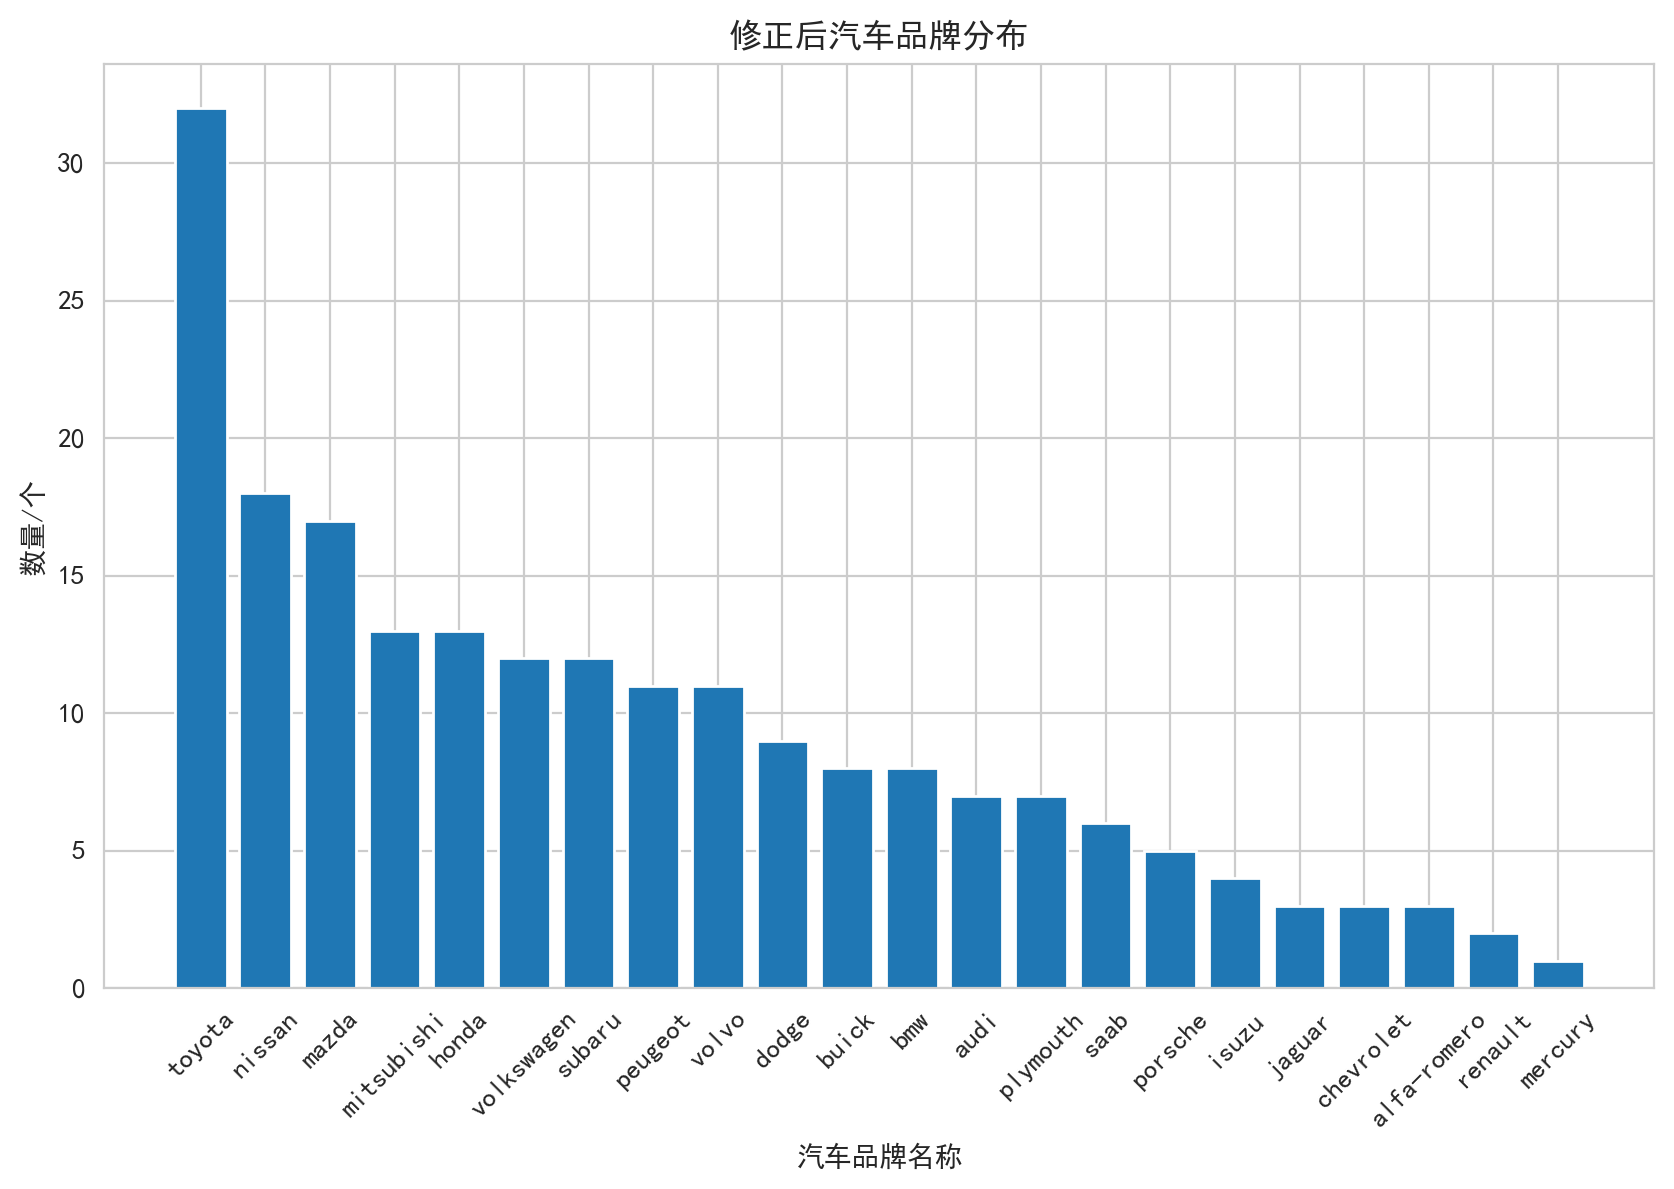

0
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64


In [17]:
import matplotlib.pyplot as plt

car_brand = row_data['carBrand'].str.split(expand=True)[0]

brand_counts = car_brand.value_counts()

plt.figure(figsize=(10, 6))
plt.bar(brand_counts.index, brand_counts.values)
plt.xlabel('汽车品牌名称')
plt.ylabel('数量/个')
plt.title('修正后汽车品牌分布')

plt.xticks(rotation=45)
plt.show()

print(brand_counts)

In [18]:
# 由上面描述性统计可知，车身长范围为141.1~208.1英寸之间，可划分为5类
label = [0, 1, 2, 3, 4]
car_size = pd.cut(car_df.carlength, 5, labels=label)
print(car_size)

#将车型大小分类放入数据集中
row_data['carSize'] = car_size
car_df['carSize'] = car_size

0      2
1      2
2      2
3      2
4      2
      ..
200    3
201    3
202    3
203    3
204    3
Name: carlength, Length: 205, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]


In [19]:
#查看数值型特征的相关系数
drop_list = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']
tmp = car_df.drop(drop_list, axis=1)
print(tmp.info())
np.savetxt('row_data.csv', tmp)
df_corr = tmp.corr()
df_corr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    int8    
 1   doornumber        205 non-null    int64   
 2   wheelbase         205 non-null    float16 
 3   carlength         205 non-null    float16 
 4   carwidth          205 non-null    float16 
 5   carheight         205 non-null    float16 
 6   curbweight        205 non-null    int16   
 7   cylindernumber    205 non-null    int64   
 8   enginesize        205 non-null    int16   
 9   boreratio         205 non-null    float16 
 10  stroke            205 non-null    float16 
 11  compressionratio  205 non-null    float16 
 12  horsepower        205 non-null    int16   
 13  peakrpm           205 non-null    int16   
 14  citympg           205 non-null    int8    
 15  highwaympg        205 non-null    int8    
 16  price             205 non-

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carSize
symboling,1.000000,-0.664073,-0.531816,-0.356811,-0.231642,-0.541832,-0.227691,-0.113129,-0.105790,-0.130193,-0.008680,-0.178600,0.070873,0.273606,-0.035823,0.034606,-0.079933,-0.281109
doornumber,-0.664073,1.000000,0.447372,0.398163,0.205183,0.552387,0.197379,-0.016009,0.020742,0.119329,-0.010997,0.177904,-0.126947,-0.247668,-0.012417,-0.036330,0.031787,0.357592
wheelbase,-0.531816,0.447372,1.000000,0.874847,0.795329,0.589862,0.776465,0.339513,0.569298,0.488926,0.160802,0.249670,0.353369,-0.359938,-0.470673,-0.544282,0.578087,0.827979
carlength,-0.356811,0.398163,0.874847,1.000000,0.841193,0.490902,0.877967,0.430769,0.683517,0.606529,0.130035,0.158328,0.552874,-0.287495,-0.671103,-0.704866,0.682811,0.960126
carwidth,-0.231642,0.205183,0.795329,0.841193,1.000000,0.278012,0.867735,0.546134,0.737239,0.560157,0.185074,0.180938,0.642170,-0.220264,-0.643334,-0.677622,0.760437,0.797943
carheight,-0.541832,0.552387,0.589862,0.490902,0.278012,1.000000,0.295280,-0.013709,0.067106,0.170598,-0.055550,0.261172,-0.109151,-0.320641,-0.048238,-0.107059,0.119317,0.456570
curbweight,-0.227691,0.197379,0.776465,0.877967,0.867735,0.295280,1.000000,0.609727,0.850594,0.648757,0.168835,0.151321,0.750739,-0.266243,-0.757414,-0.797465,0.835307,0.870643
cylindernumber,-0.113129,-0.016009,0.339513,0.430769,0.546134,-0.013709,0.609727,1.000000,0.846031,0.231644,0.007966,-0.020012,0.692016,-0.124172,-0.445837,-0.466666,0.718344,0.393823
enginesize,-0.105790,0.020742,0.569298,0.683517,0.737239,0.067106,0.850594,0.846031,1.000000,0.584114,0.203059,0.028960,0.809769,-0.244660,-0.653658,-0.677470,0.874176,0.659525
boreratio,-0.130193,0.119329,0.488926,0.606529,0.560157,0.170598,0.648757,0.231644,0.584114,1.000000,-0.055488,0.004973,0.573692,-0.255060,-0.584721,-0.587210,0.553558,0.613308


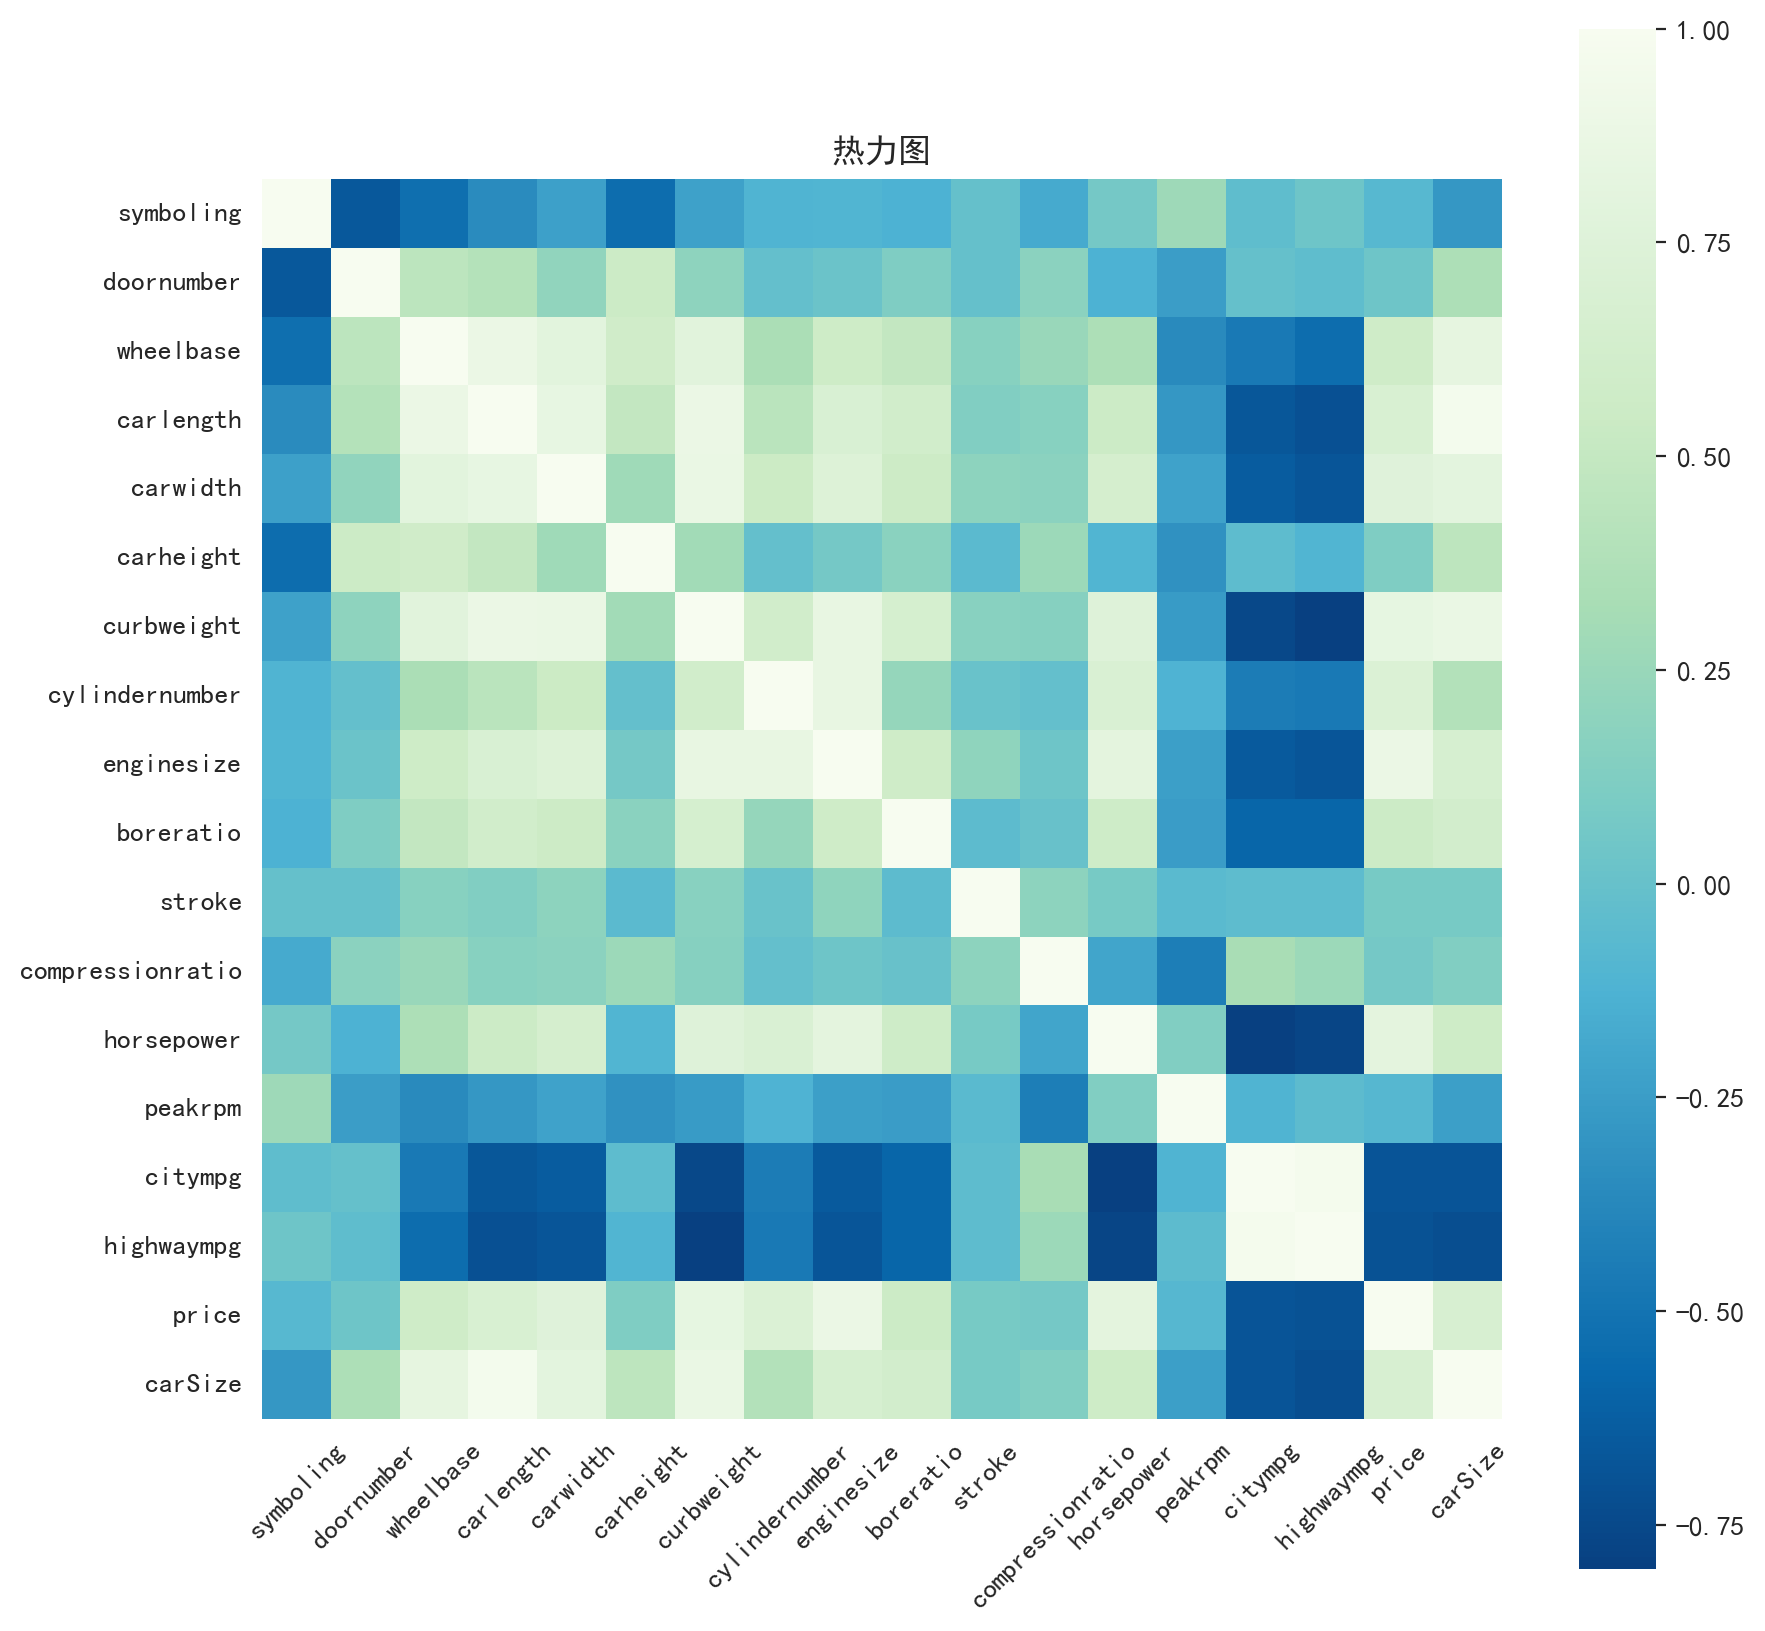

In [20]:
# 绘制相关性热力图
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = False
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df_corr,mask=mask,square=True,annot=False, cmap='GnBu_r')
    ax.set_title("热力图")
    plt.xticks(rotation=45)  # 设置横坐标标签旋转角度为45度
plt.show()

In [21]:
#对于类别离散型特征，取值间没有大小意义的，可采用one-hot编码
features = car_df
cate = features.select_dtypes(include='object').columns
print(cate)

features = features.join(pd.get_dummies(features[cate])).drop(cate,axis=1)
features.info()

np.savetxt('init_data.csv', features)

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   symboling             205 non-null    int8    
 1   doornumber            205 non-null    int64   
 2   wheelbase             205 non-null    float16 
 3   carlength             205 non-null    float16 
 4   carwidth              205 non-null    float16 
 5   carheight             205 non-null    float16 
 6   curbweight            205 non-null    int16   
 7   cylindernumber        205 non-null    int64   
 8   enginesize            205 non-null    int16   
 9   boreratio             205 non-null    float16 
 10  stroke                205 non-null    float16 
 11  compressionratio      205 non-null    float16 
 12  horsepower            205 no

In [22]:
#对数值型数据进行归一化
from sklearn import preprocessing

features_scale = preprocessing.MinMaxScaler().fit_transform(features)
features_scale = pd.DataFrame(features_scale)
features_scale.head()

np.savetxt('scale_data.csv', features_scale)

In [23]:
# 对数据集进行PCA降维（信息保留为99.99%）
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9999)  #保证降维后的数据保持90%的信息，则填0.9
features_pca = pca.fit_transform(features_scale)

#降维后，每个主要成分的解释方差占比（解释PC携带的信息多少）
ratio = pca.explained_variance_ratio_
print('各主成分的解释方差占比：',ratio)

#降维后有几个成分
print('降维后有几个成分：',len(ratio))

#累计解释方差占比
cum_ratio = np.cumsum(ratio)
print('累计解释方差占比：',cum_ratio)

各主成分的解释方差占比： [2.58263146e-01 1.69351280e-01 1.22957429e-01 7.32973848e-02
 6.22388199e-02 4.89859350e-02 4.44593834e-02 3.17484653e-02
 2.72921317e-02 2.12697396e-02 2.02969540e-02 1.58337621e-02
 1.53036214e-02 1.28999893e-02 1.22374812e-02 9.84181972e-03
 8.77718271e-03 8.26162323e-03 6.81618525e-03 4.79967064e-03
 4.49388271e-03 3.49474546e-03 3.14568698e-03 2.58024666e-03
 1.92702063e-03 1.85233948e-03 1.47855680e-03 1.29641752e-03
 1.17305324e-03 8.85539924e-04 7.10491373e-04 5.29168645e-04
 4.39043030e-04 3.11987566e-04 2.46077366e-04 2.01288633e-04
 1.22364209e-04 1.12781594e-04]
降维后有几个成分： 38
累计解释方差占比： [0.25826315 0.42761443 0.55057186 0.62386924 0.68610806 0.735094
 0.77955338 0.81130184 0.83859398 0.85986372 0.88016067 0.89599443
 0.91129805 0.92419804 0.93643552 0.94627734 0.95505453 0.96331615
 0.97013233 0.974932   0.97942589 0.98292063 0.98606632 0.98864657
 0.99057359 0.99242593 0.99390448 0.9952009  0.99637395 0.99725949
 0.99796999 0.99849915 0.9989382  0.99925018 0.999

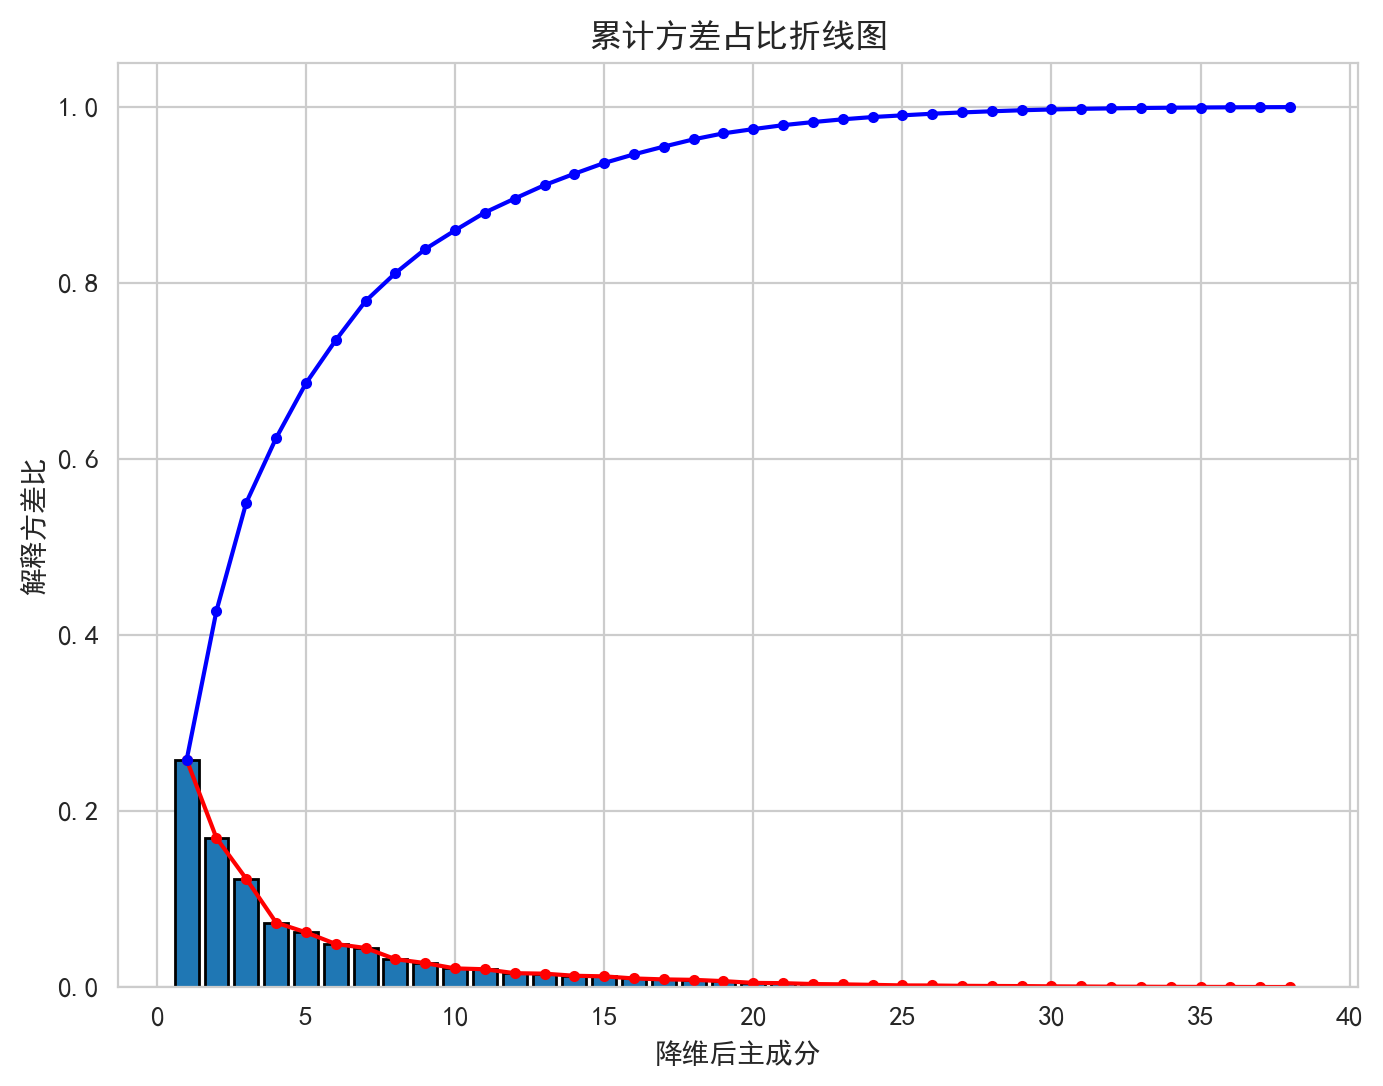

In [24]:
# 绘制PCA降维后各成分方差占比的直方图和累计方差占比折线图
plt.figure(figsize=(8,6))
X = range(1,len(ratio)+1)
Y = ratio
plt.bar(X,Y,edgecolor='black')
plt.plot(X,Y,'r.-')
plt.plot(X,cum_ratio,'b.-')
plt.ylabel('解释方差比')
plt.xlabel('降维后主成分')
plt.title('累计方差占比折线图')
plt.show()

In [25]:
#PCA选择降维保留7个主要成分
pca = PCA(n_components=15) 
features3 = pca.fit_transform(features_pca)
np.savetxt('processed_data.csv', features3)

#降维后的累计各成分方差占比和（即解释PC携带的信息多少）
print(sum(pca.explained_variance_ratio_))

0.9364985527634798


In [26]:
|# 肘方法看k值，簇内离差平方和
# 对每一个k值进行聚类并且记下对于的SSE，然后画出k和SSE的关系图
from sklearn.cluster import KMeans

sse = []
for i in range(1,15):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(features3)
    sse.append(km.inertia_)

plt.plot(range(1,15),sse,marker='*')
plt.xlabel('n_clusters')
plt.ylabel('distortions')
plt.title("The Elbow Method")
plt.show()

SyntaxError: invalid syntax (601605765.py, line 1)

In [27]:
#进行K-Means聚类分析
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,random_state=0)
kmeans.fit(features3)
lab = kmeans.predict(features3)
print(lab)

NameError: name 'KMeans' is not defined

In [28]:
#绘制聚类结果2维的散点图
plt.figure(figsize=(8,8))
plt.scatter(features3[:,0],features3[:,1],c=lab)
for ii in np.arange(205):
    plt.text(features3[ii,0],features3[ii,1],s=row_data.car_ID[ii])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means PCA')
plt.show()

NameError: name 'lab' is not defined

<Figure size 800x800 with 0 Axes>

NameError: name 'lab' is not defined

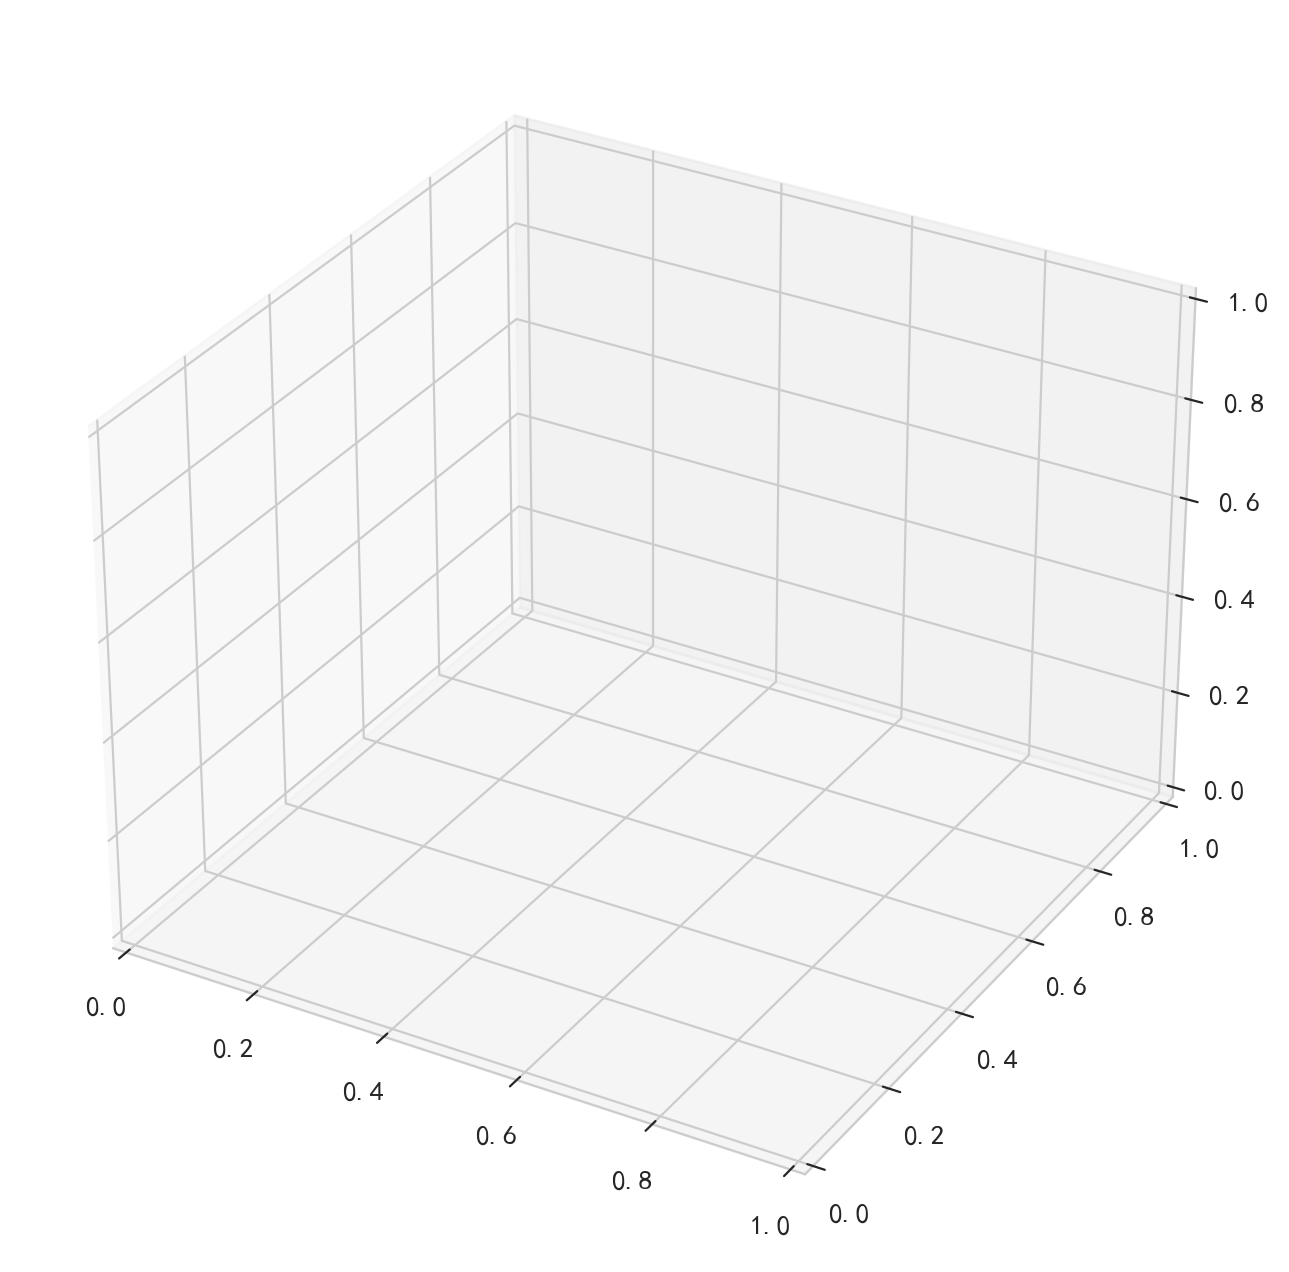

In [29]:
#绘制聚类结果后3d散点图
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(8,8))
ax=plt.subplot(111,projection='3d')
ax.scatter(features3[:,0],features3[:,1],features3[:,2],c=lab)
#视角转换，转换后更易看出簇群
ax.view_init(30,45) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()